# Objective: Estimate how power changes with different batch multiplexing study designs

- scPOST allows users to change their simulated study design so that they may test how different study design choices affect their power.
- An important aspect of scRNA-seq experiments involves determining how to run the experiments. If the study size is large enough, samples may need to be assayed in batches, which introduces batch effects. 
- Batch effects can potentially reduce power. Assaying several samples in the same batch (multiplexing) is a standard part of multi-sample experiments. Here, we explore how scPOST can be used to evaluate the performance of different multiplexing schemes

We'll simulate datasets from a rheumatoid arthritis (RA) dataset described in Zhang F, Wei K, Slowikowski K, Fonseka C, Rao DA, *et al.*, *Nature Immunol* (2020). Here, we use the dataset in its non-batch-corrected state, so that the input dataset contains batch effects (without batch effects, the differences in power between sequential and multiplexed study designs are similar). The metadata and PC embeddings for this non-batch-corrected dataset is provided in the pre-loaded data: ra_PreHarmObj.

In this tutorial, we'll:
- Simulate datasets featuring study designs with different multiplexing schemes
- Visualize how power changes with different multiplexing schemes

**In this tutorial, we assume you have at least read the "Getting Started" tutorial, which provides more detail in creating scPOST workflows.**

## Load packages

In [2]:
suppressPackageStartupMessages({
    # imports for analyses
    library(scpost)
    library(dplyr)
    
    # imports for figures
    library(ggplot2)
    library(RColorBrewer)
    library(patchwork)
})

fig.size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width)
}

# Step 1: Parameter estimation

In [2]:
system.time({
    ra_freqEstimates <- estimateFreqVar(meta = ra_PreHarmObj$meta, clusCol = 'preHarmClus', sampleCol = 'sample', logCov = TRUE)
})

   user  system elapsed 
  0.248   0.003   0.252 

In [3]:
system.time({
    ra_pcEstimates <- estimatePCVar(pca = ra_PreHarmObj$embeddings, npcs = 20, meta = ra_PreHarmObj$meta, clusCol = 'preHarmClus',
                                    sampleCol = 'sample', batchCol = 'batch')
})

   user  system elapsed 
 11.764   0.021  11.802 

# Step 2 & 3: Simulate datasets

We'll simulate 3 different multiplexing designs. First, we created folders for each design that we will place the simulations into. We'll explore:

1. A non-multiplexed sequential study design where each sample is run in its own batch
2. A standard multiplexed study design where multiple samples are run in the same batch (4 samples per batch)
3. An alternative multiplexing study design wehere samples a split into sub-samples, which are then placed into different batches (see figure in this section)

## Sequential 

Let's first simulate a 20-sample study with a simple design. We'll simulate for each sample to be run **sequentially** - one sample for one batch. This is not usually the standard design for modern scRNA-seq experiments, as multiplexing helps reduce cost. However, we show the results for this design as demonstration in order to compare.

In [4]:
set.seed(23)

# Set the number of samples, number of cells per sample, and create sequential batch structure
ncases <- 20
nctrls <- 20
nbatches <- ncases + nctrls
batchStructure <- distribSamplePerBatch(ncases = ncases, nctrls = nctrls, nbatches = nbatches)
ncells <- rep(100, times = ncases + nctrls)
names(ncells) <- batchStructure$sample_names

batchStructure %>% str(1)

params <- createParamTable(
    nreps = 10,
    clus = "clus0",
    fc = 2,
    ncases = ncases,
    nctrls = nctrls,
    nbatches = nbatches,
    b_scale = 1,
    s_scale = 1,
    cf_scale = 1,
    res_use = 2,
    cond_induce = "cases",
    save_path = file.path(getwd(), "scpostSims//multiplexing/sequential/")
)

params %>% head(2)

List of 4
 $ batches     :List of 40
 $ sample_names: chr [1:40] "sample1" "sample2" "sample3" "sample4" ...
 $ cases       : chr [1:20] "sample29" "sample28" "sample8" "sample34" ...
 $ ctrls       : chr [1:20] "sample1" "sample3" "sample4" "sample5" ...


,rep,ncases,nctrls,nbatches,b_scale,s_scale,cf_scale,clus,fc,res_use,save_path,cond_induce,seed
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<chr>,<int>
1,1,20,20,40,1,1,1,clus0,2,2,/data/srlab1/nmillard/scpost/vignettes/scpostSims//multiplexing/sequential/,cases,1294817627
2,2,20,20,40,1,1,1,clus0,2,2,/data/srlab1/nmillard/scpost/vignettes/scpostSims//multiplexing/sequential/,cases,1413599036


In [5]:
suppressWarnings({
    lapply(seq(nrow(params)), function(x){
            simDataset.withMASC(
                save_path = params[x, 'save_path'],
                rep = params[x, 'rep'],
                seed = params[x, 'seed'],
                ncases = params[x, 'ncases'],
                nctrls = params[x, 'nctrls'],
                nbatches = params[x, 'nbatches'],
                batchStructure = batchStructure,
                ncells = ncells,
                centroids = ra_pcEstimates$centroids,
                pc_cov_list = ra_pcEstimates$pc_cov_list,
                batch_vars = ra_pcEstimates$batch_vars,
                b_scale = params[x, 'b_scale'],
                sample_vars = ra_pcEstimates$sample_vars,
                s_scale = params[x, 's_scale'],
                cfcov = ra_freqEstimates$cfcov,
                cf_scale = params[x, 'cf_scale'],
                meanFreqs = ra_freqEstimates$meanFreq,
                clus = params[x, 'clus'],
                fc = params[x, 'fc'],
                cond_induce = params[x, 'cond_induce'],
                res_use = params[x, 'res_use'], 
                mc.cores = 1,
                clusterData = TRUE,
                returnPCs = FALSE
            )
    })
})

Simulated dataset at 2021-07-21 15:11:29

Simulated dataset at 2021-07-21 15:11:35

Simulated dataset at 2021-07-21 15:11:40

Simulated dataset at 2021-07-21 15:11:45

Simulated dataset at 2021-07-21 15:11:51

Simulated dataset at 2021-07-21 15:11:56

Simulated dataset at 2021-07-21 15:12:01

Simulated dataset at 2021-07-21 15:12:07

Simulated dataset at 2021-07-21 15:12:12

Simulated dataset at 2021-07-21 15:12:18



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

## Multiplexed

We now simulate a multiplexed study design, where the 20 samples are split into 5 batches (4 samples per batch). This is typically the format modern scRNA-seq experiments are run. 

**Note: if you wish to slightly change the batch structure, you may edit the "batches" element of the batchStructure variable, which contains the placement of which samples are placed into which batch**

In [3]:
set.seed(23)

# Set the number of samples, number of cells per sample, and create sequential batch structure
ncases <- 20
nctrls <- 20
nbatches <- 5
batchStructure <- distribSamples(ncases = ncases, nctrls = nctrls, nbatches = nbatches)
ncells <- rep(100, times = ncases + nctrls)
names(ncells) <- batchStructure$sample_names

batchStructure %>% str

params2 <- createParamTable(
    nreps = 10,
    clus = "clus0",
    fc = 2,
    ncases = ncases,
    nctrls = nctrls,
    nbatches = nbatches,
    b_scale = 1,
    s_scale = 1,
    cf_scale = 1,
    res_use = 2,
    cond_induce = "cases",
    save_path = file.path(getwd(), "scpostSims//multiplexing/multi/")
)

List of 4
 $ batches     :List of 5
  ..$ batch1:List of 2
  .. ..$ cases: chr [1:4] "sample29" "sample21" "sample22" "sample25"
  .. ..$ ctrls: chr [1:4] "sample1" "sample11" "sample20" "sample30"
  ..$ batch2:List of 2
  .. ..$ cases: chr [1:4] "sample28" "sample36" "sample13" "sample32"
  .. ..$ ctrls: chr [1:4] "sample3" "sample14" "sample23" "sample35"
  ..$ batch3:List of 2
  .. ..$ cases: chr [1:4] "sample8" "sample6" "sample10" "sample7"
  .. ..$ ctrls: chr [1:4] "sample4" "sample16" "sample24" "sample37"
  ..$ batch4:List of 2
  .. ..$ cases: chr [1:4] "sample34" "sample33" "sample12" "sample2"
  .. ..$ ctrls: chr [1:4] "sample5" "sample18" "sample26" "sample38"
  ..$ batch5:List of 2
  .. ..$ cases: chr [1:4] "sample17" "sample31" "sample39" "sample15"
  .. ..$ ctrls: chr [1:4] "sample9" "sample19" "sample27" "sample40"
 $ sample_names: chr [1:40] "sample1" "sample2" "sample3" "sample4" ...
 $ cases       : chr [1:20] "sample29" "sample28" "sample8" "sample34" ...
 $ ctrls   

In [86]:
suppressWarnings({
    lapply(seq(nrow(params2)), function(x){
            simDataset.withMASC(
                save_path = params2[x, 'save_path'],
                rep = params2[x, 'rep'],
                seed = params2[x, 'seed'],
                ncases = params2[x, 'ncases'],
                nctrls = params2[x, 'nctrls'],
                nbatches = params2[x, 'nbatches'],
                batchStructure = batchStructure,
                ncells = ncells,
                centroids = ra_pcEstimates$centroids,
                pc_cov_list = ra_pcEstimates$pc_cov_list,
                batch_vars = ra_pcEstimates$batch_vars,
                b_scale = params2[x, 'b_scale'],
                sample_vars = ra_pcEstimates$sample_vars,
                s_scale = params2[x, 's_scale'],
                cfcov = ra_freqEstimates$cfcov,
                cf_scale = params2[x, 'cf_scale'],
                meanFreqs = ra_freqEstimates$meanFreq,
                clus = params2[x, 'clus'],
                fc = params2[x, 'fc'],
                cond_induce = params2[x, 'cond_induce'],
                res_use = params2[x, 'res_use'], 
                mc.cores = 1,
                clusterData = TRUE,
                returnPCs = FALSE
            )
    })
})

Simulated dataset at 2021-07-21 14:59:33

Simulated dataset at 2021-07-21 14:59:39

Simulated dataset at 2021-07-21 14:59:44

Simulated dataset at 2021-07-21 14:59:49

Simulated dataset at 2021-07-21 14:59:55

Simulated dataset at 2021-07-21 15:00:01

Simulated dataset at 2021-07-21 15:00:06

Simulated dataset at 2021-07-21 15:00:12

Simulated dataset at 2021-07-21 15:00:17

Simulated dataset at 2021-07-21 15:00:22



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

## Alternative multiplexing design

We now simulate an alternative multiplexed study design. scRNA-seq experiments are costly, which may limit the capacity for investigators to experiment with different batch multiplexing structures. scPOST allows investigators to simulate how different structures may benefit their power. 

For this alternative multiplxed study design, we take samples and split them into sub-samples. These sub-samples are then subsequently placed into different batches, so several batches in the study contain sub-samples from the same parent sample (see figure). This has the consequence of artificially increasing your effective sample size, with the trade-off of decreasing the number of cells per "sample". However, as we show in the scPOST manuscript and the "Optimizing study designs: samples vs. cells per sample" tutorial, increasing the number of samples in your study can yield dramatic increases to your power.

In [ ]:
# ![test](images/Power_Suppl_MultiplexDesign.png){width=85%}

In [87]:
set.seed(23)

# Set the number of samples, number of cells per sample, and create sequential batch structure
ncases <- 20
nctrls <- 20
nbatches <- 5
batchStructure <- distribSplitSamples(ncases = ncases, nctrls = nctrls, 
                                      nbatches = nbatches, numSubsamples = 4)
# Reduce number of cells per sample so that they the total number of cells is the same as the previous study designs
ncells <- rep(25, times = ncases + nctrls)
names(ncells) <- batchStructure$sample_names

batchStructure %>% str

params3 <- createParamTable(
    nreps = 10,
    clus = "clus0",
    fc = 2,
    ncases = ncases,
    nctrls = nctrls,
    nbatches = nbatches,
    b_scale = 1,
    s_scale = 1,
    cf_scale = 1,
    res_use = 2,
    cond_induce = "cases",
    save_path = file.path(getwd(), "scpostSims//multiplexing/alternativeMulti/")
)

List of 4
 $ batches     :List of 5
  ..$ batch1:List of 2
  .. ..$ cases: chr [1:16] "sample33" "sample10" "sample26" "sample17" ...
  .. ..$ ctrls: chr [1:16] "sample11" "sample32" "sample34" "sample38" ...
  ..$ batch2:List of 2
  .. ..$ cases: chr [1:16] "sample40" "sample1" "sample36" "sample24" ...
  .. ..$ ctrls: chr [1:16] "sample15" "sample31" "sample30" "sample21" ...
  ..$ batch3:List of 2
  .. ..$ cases: chr [1:16] "sample4" "sample1" "sample3" "sample25" ...
  .. ..$ ctrls: chr [1:16] "sample22" "sample30" "sample37" "sample2" ...
  ..$ batch4:List of 2
  .. ..$ cases: chr [1:16] "sample36" "sample18" "sample10" "sample24" ...
  .. ..$ ctrls: chr [1:16] "sample35" "sample8" "sample28" "sample38" ...
  ..$ batch5:List of 2
  .. ..$ cases: chr [1:16] "sample7" "sample19" "sample25" "sample3" ...
  .. ..$ ctrls: chr [1:16] "sample37" "sample28" "sample2" "sample32" ...
 $ sample_names: chr [1:40] "sample1" "sample2" "sample3" "sample4" ...
 $ cases       : chr [1:20] "sample1

In [88]:
suppressWarnings({
    lapply(seq(nrow(params3)), function(x){
            simDataset.withMASC(
                save_path = params3[x, 'save_path'],
                rep = params3[x, 'rep'],
                seed = params3[x, 'seed'],
                ncases = params3[x, 'ncases'],
                nctrls = params3[x, 'nctrls'],
                nbatches = params3[x, 'nbatches'],
                batchStructure = batchStructure,
                ncells = ncells,
                centroids = ra_pcEstimates$centroids,
                pc_cov_list = ra_pcEstimates$pc_cov_list,
                batch_vars = ra_pcEstimates$batch_vars,
                b_scale = params3[x, 'b_scale'],
                sample_vars = ra_pcEstimates$sample_vars,
                s_scale = params3[x, 's_scale'],
                cfcov = ra_freqEstimates$cfcov,
                cf_scale = params3[x, 'cf_scale'],
                meanFreqs = ra_freqEstimates$meanFreq,
                clus = params3[x, 'clus'],
                fc = params3[x, 'fc'],
                cond_induce = params3[x, 'cond_induce'],
                res_use = params3[x, 'res_use'], 
                mc.cores = 1,
                clusterData = TRUE,
                returnPCs = FALSE
            )
    })
})

Simulated dataset at 2021-07-21 15:00:29

Simulated dataset at 2021-07-21 15:00:36

Simulated dataset at 2021-07-21 15:00:43

Simulated dataset at 2021-07-21 15:00:48

Simulated dataset at 2021-07-21 15:00:55

Simulated dataset at 2021-07-21 15:01:02

Simulated dataset at 2021-07-21 15:01:07

Simulated dataset at 2021-07-21 15:01:14

Simulated dataset at 2021-07-21 15:01:20

Simulated dataset at 2021-07-21 15:01:26



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

# Load simulated datasets and calculate power

In [6]:
dir_sequential <- file.path(getwd(), "scpostSims/multiplexing//sequential")
filenames_sequential <- list.files(path = dir_sequential,
                                  full.names = T) %>% basename
resTables_sequential <- lapply(filenames_sequential, function(x){
        readRDS(file.path(dir_sequential, x))[['res']]
})

power_sequential <- getPowerFromRes(
    resFiles = filenames_sequential,
    resTables = resTables_sequential,
    threshold = 0.05,
    z = 1.96,
    stratByClus = FALSE
)
resTables_sequential %>% length
power_sequential

[1] 10

ind_fc,ncases,nctrls,nsamples,ncells,bscale,sscale,cfscale,trials,masc_power,masc_power_ci
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
2,20,20,40,100,1,1,1,10,0,0


In [7]:
dir_multi <- file.path(getwd(), "scpostSims/multiplexing//multi")
filenames_multi <- list.files(path = dir_multi,
                                  full.names = T) %>% basename
resTables_multi <- lapply(filenames_multi, function(x){
        readRDS(file.path(dir_multi, x))[['res']]
})

power_multi <- getPowerFromRes(
    resFiles = filenames_multi,
    resTables = resTables_multi,
    threshold = 0.05,
    z = 1.96,
    stratByClus = FALSE
)
resTables_multi %>% length
power_multi

[1] 10

ind_fc,ncases,nctrls,nsamples,ncells,bscale,sscale,cfscale,trials,masc_power,masc_power_ci
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
2,20,20,40,100,1,1,1,10,0,0


In [8]:
dir_altMulti <- file.path(getwd(), "scpostSims/multiplexing/alternativeMulti")
filenames_altMulti <- list.files(path = dir_altMulti,
                                  full.names = T) %>% basename
resTables_altMulti <- lapply(filenames_altMulti, function(x){
        readRDS(file.path(dir_altMulti, x))[['res']]
})

power_altMulti <- getPowerFromRes(
    resFiles = filenames_altMulti,
    resTables = resTables_altMulti,
    threshold = 0.05,
    z = 1.96,
    stratByClus = FALSE
)
resTables_altMulti %>% length
power_altMulti

[1] 10

ind_fc,ncases,nctrls,nsamples,ncells,bscale,sscale,cfscale,trials,masc_power,masc_power_ci
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
2,20,20,40,25,1,1,1,10,0.3,0.284031


In [9]:
comb <- rbind.data.frame(power_sequential, power_multi, power_altMulti)
comb$Power <- 100 * comb$masc_power
comb$CI <- 100 * comb$masc_power_ci
comb$context <- factor(c("Sequential", "Multiplexed", "Alternative multiplexed"),
                       levels = c("Sequential", "Multiplexed", "Alternative multiplexed"))
plotPal <- colorRampPalette(brewer.pal(9, 'Set1'))

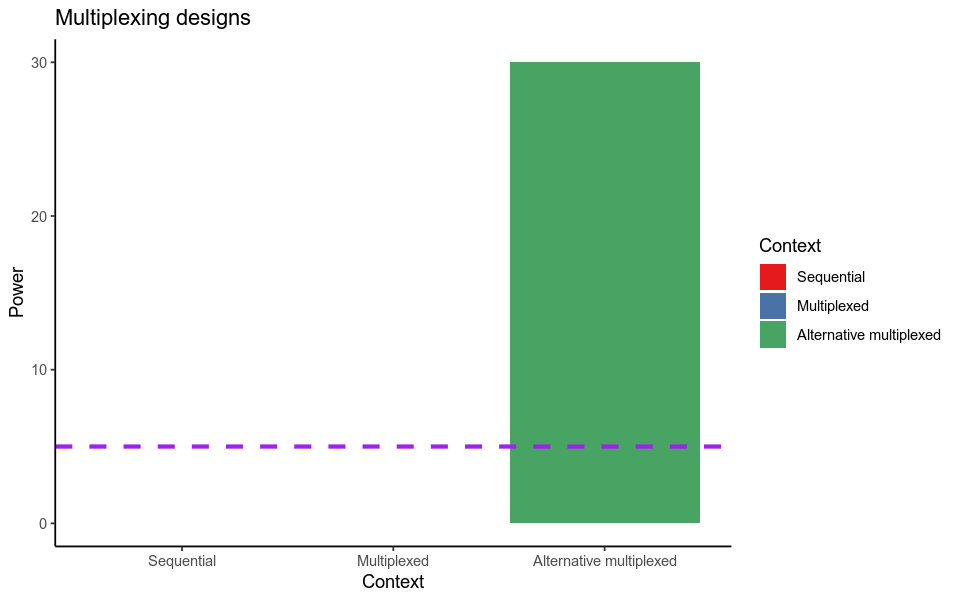

In [10]:
fig.size(5,8)
comb %>% sample_frac %>%
    ggplot(aes(x = context, y = Power, fill = context)) +
    geom_bar(stat = 'identity', position = position_dodge()) +
    labs(title = 'Multiplexing designs', x = 'Context', col = 'Context') +
    scale_fill_manual(values = plotPal(10), name = 'Context') +
    geom_hline(yintercept = 5, col = 'purple', size = 1.2, linetype = 2) +
    theme_classic() 

In this experimental context and with these parameters, the altnerative multiplexing study design actually provides noticeable power benefits. Generally, we've found that at normal/larger study sizes, the standard multiplexing and alternative multiplexing study designs tend to perform similar in terms of power. Furthermore, both multiplexing schemes yield more power than the sequential scheme. Finally, as expected, as batch effects increase, the benefits of multiplexing increase.

More results can be found in the scPOST manuscript, which provide more comparisons between the sequential scheme and the alternative multiplexing scheme.

# Session information

In [28]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server release 6.5 (Santiago)

Matrix products: default
BLAS/LAPACK: /PHShome/nm455/miniconda3/envs/paraR4.0.3/lib/libopenblasp-r0.3.12.so

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.1.1    RColorBrewer_1.1-2 ggplot2_3.3.3      dplyr_1.0.4       
[5] scpost_1.0        

loaded via a namespace (and not attached):
  [1] Seurat_4.0.0  